# Visualizing Covid-19 Data

In this project, I will visualize Covid-19 data from the first few weeks of the outbreak to see at what point the epidemic became a global pandemic

Data Source: https://github.com/RamiKrispin/coronavirus

In [8]:
# Loading  packages
library(readr)
library(ggplot2)
library(dplyr)

This table shows the cumulative confirmed cases of COVID-19 worldwide by date. 

In [9]:
# Reading datasets
confirmed_cases_worldwide <- read_csv("datasets/confirmed_cases_worldwide.csv")
head(confirmed_cases_worldwide)

Rows: 56 Columns: 2
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl  (1): cum_cases
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


date,cum_cases
<date>,<dbl>
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1434
2020-01-26,2118
2020-01-27,2927


Just reading numbers in a table makes it hard to get a sense of the scale and growth of the outbreak, so I will create a line plot to visualize the confirmed cases worldwide.

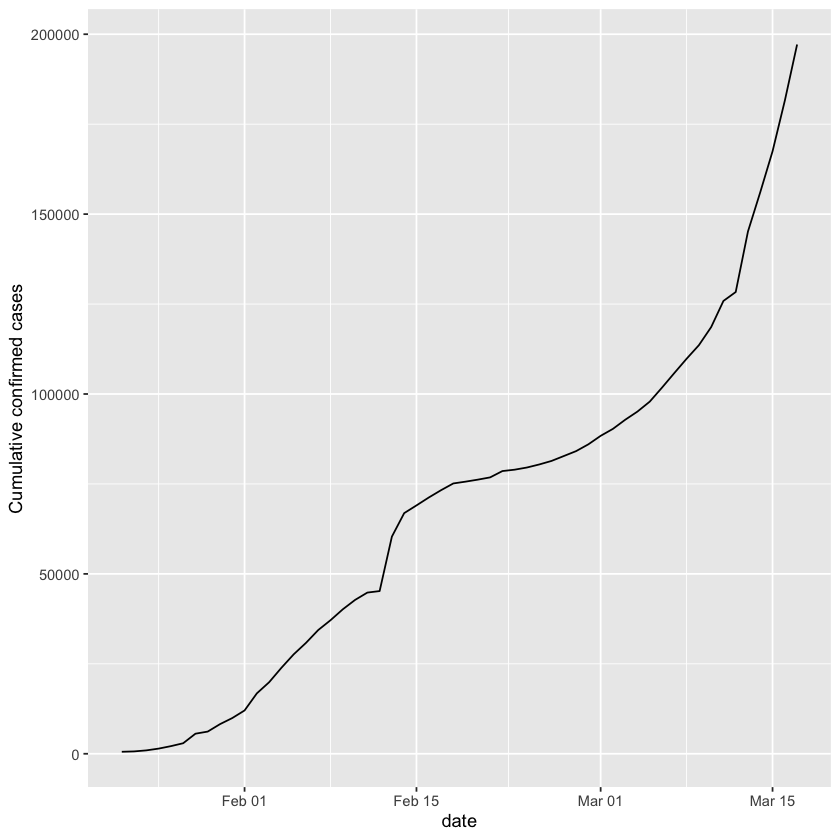

In [7]:
# Draw a line plot of cumulative cases vs. date
# Label the y-axis
ggplot(confirmed_cases_worldwide, aes(date, cum_cases)) +
  geom_line() +
  ylab("Cumulative confirmed cases")

From this plot, we can see that there is an odd jump in mid February, then the rate of new cases slows down for a while, then speeds up again in March. 

Early on in the outbreak, the COVID-19 cases were primarily centered in China, so I'm plotting confirmed COVID-19 cases in China and the rest of the world separately to get some more insight

Rows: 112 Columns: 4
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (1): is_china
dbl  (2): cases, cum_cases
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 112
Columns: 4
$ is_china  <chr> "China", "China", "China", "China", "China", "China", "China~
$ date      <date> 2020-01-22, 2020-01-23, 2020-01-24, 2020-01-25, 2020-01-26,~
$ cases     <dbl> 548, 95, 277, 486, 669, 802, 2632, 578, 2054, 1661, 2089, 47~
$ cum_cases <dbl> 548, 643, 920, 1406, 2075, 2877, 5509, 6087, 8141, 9802, 118~


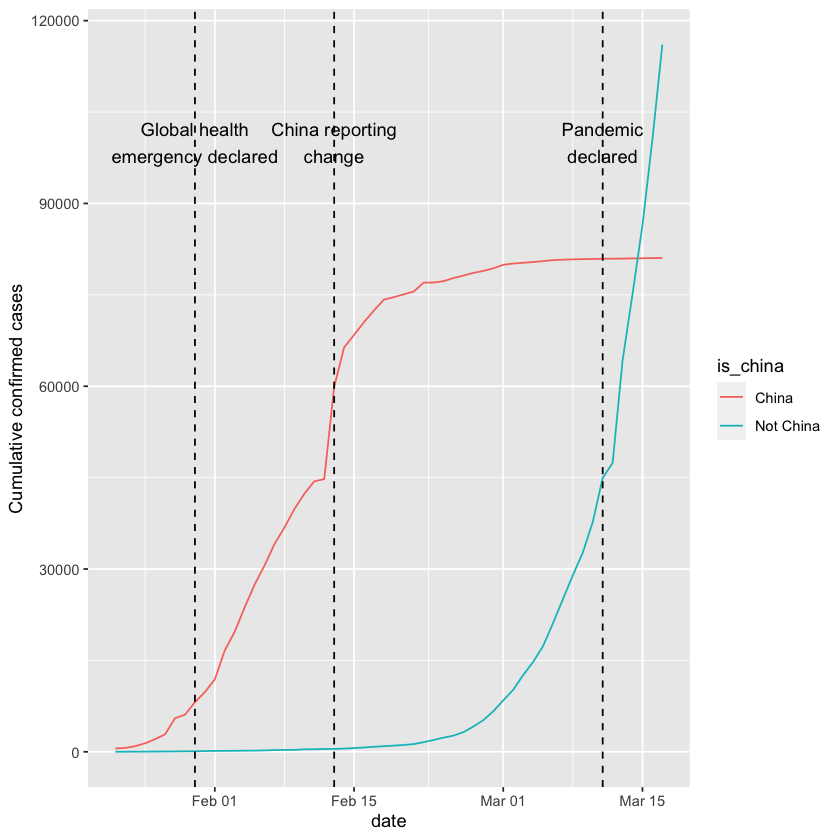

In [12]:
# Reading in dataset
confirmed_cases_china_vs_world <- read_csv("datasets/confirmed_cases_china_vs_world.csv")

# Seeing the result
glimpse(confirmed_cases_china_vs_world)

# Drawing a line plot of cumulative cases vs. date, colored by is_china
plt_cum_confirmed_cases_china_vs_world <- ggplot(confirmed_cases_china_vs_world) +
  geom_line(aes(date, cum_cases, color = is_china)) +
  ylab("Cumulative confirmed cases")

# Seeing the plot
# plt_cum_confirmed_cases_china_vs_world

# Adding context to better understand the trends
who_events <- tribble(
  ~ date, ~ event,
  "2020-01-30", "Global health\nemergency declared",
  "2020-03-11", "Pandemic\ndeclared",
  "2020-02-13", "China reporting\nchange"
) %>%
  mutate(date = as.Date(date))

plt_cum_confirmed_cases_china_vs_world +
  geom_vline(aes(xintercept = date), data = who_events, linetype = "dashed") +
  geom_text(aes(date, label = event), data = who_events, y = 1e5)

In February 2020, the majority of cases were in China. 

That changed in March when it really became a global outbreak: around March 14, the total number of cases outside China overtook the cases inside China. This was days after the WHO declared a pandemic.

There was a landmark event regarding the huge jump in the China line on February 13, 2020 because China changed the way it reported figures on that day (CT scans were accepted as evidence for COVID-19, rather than only lab tests).

When trying to assess how big future problems are going to be, we need a measure of how fast the number of cases is growing, so  I'm going to visualize if the cases are growing faster or slower than linearly.

`geom_smooth()` using formula = 'y ~ x'


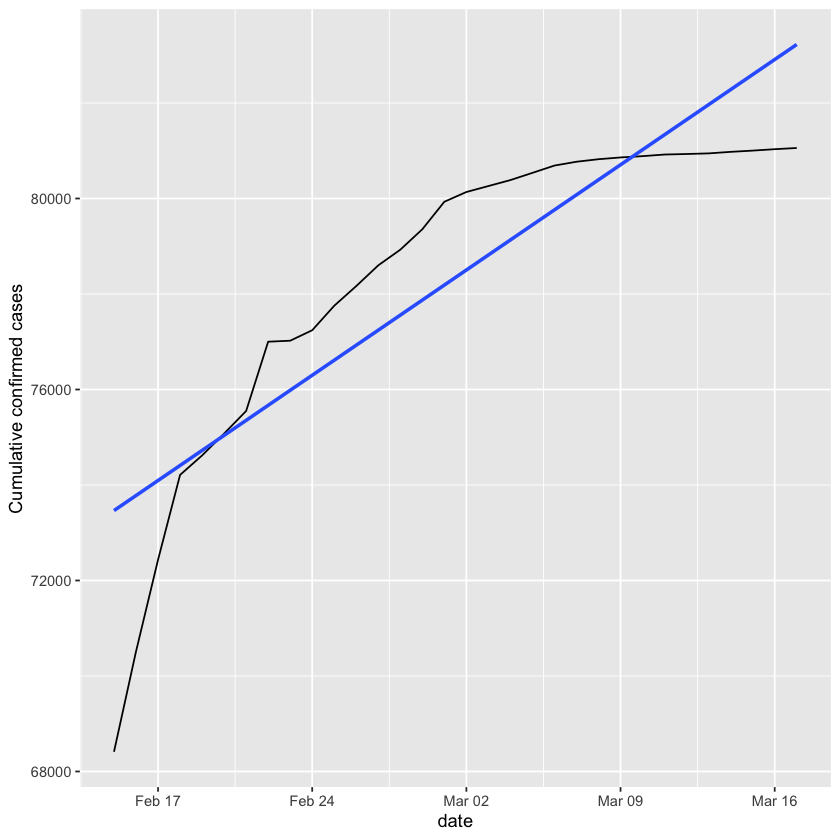

In [13]:
# Filter for China, from Feb 15
china_after_feb15 <- confirmed_cases_china_vs_world %>%
  filter(is_china == "China", date >= "2020-02-15")

# Using china_after_feb15, draw a line plot cum_cases vs. date
# Adding a smooth trend line using linear regression, with no error bars
ggplot(china_after_feb15, aes(date, cum_cases)) +
  geom_line() +
  geom_smooth(method = "lm", se = FALSE) +
  ylab("Cumulative confirmed cases")

There is a clear surge of cases around February 13, 2020, with the reporting change in China. However, a couple of days after, the growth of cases in China slows down. From the plot above, the growth rate in China is slower than linear. This indicates China had at least somewhat contained the virus in late February and early March.

Now I want to see how the rest of the world compares to linear growth

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


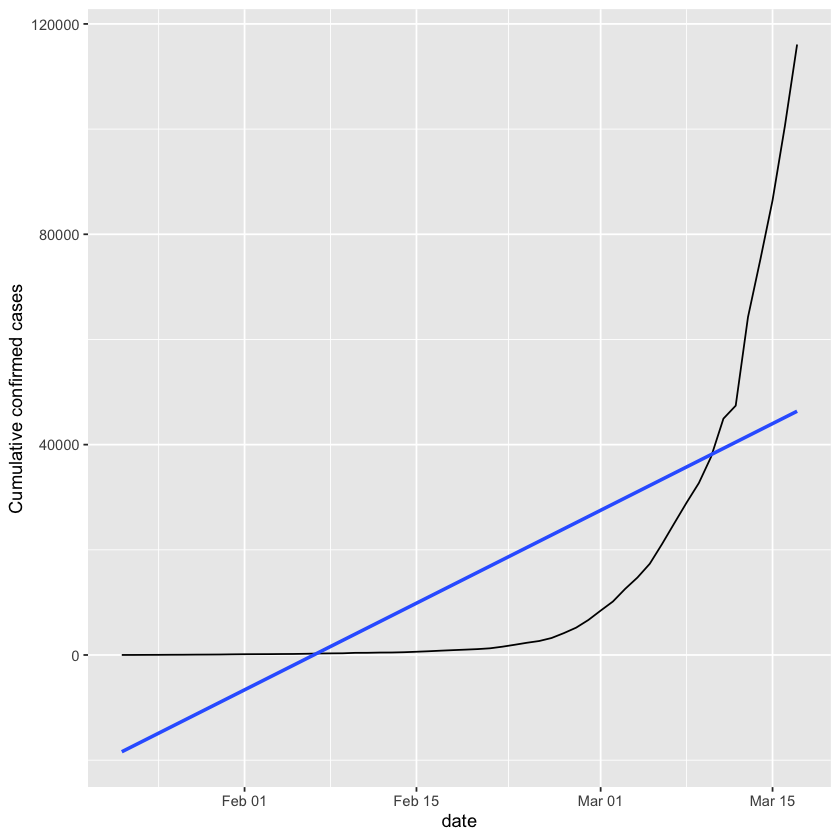

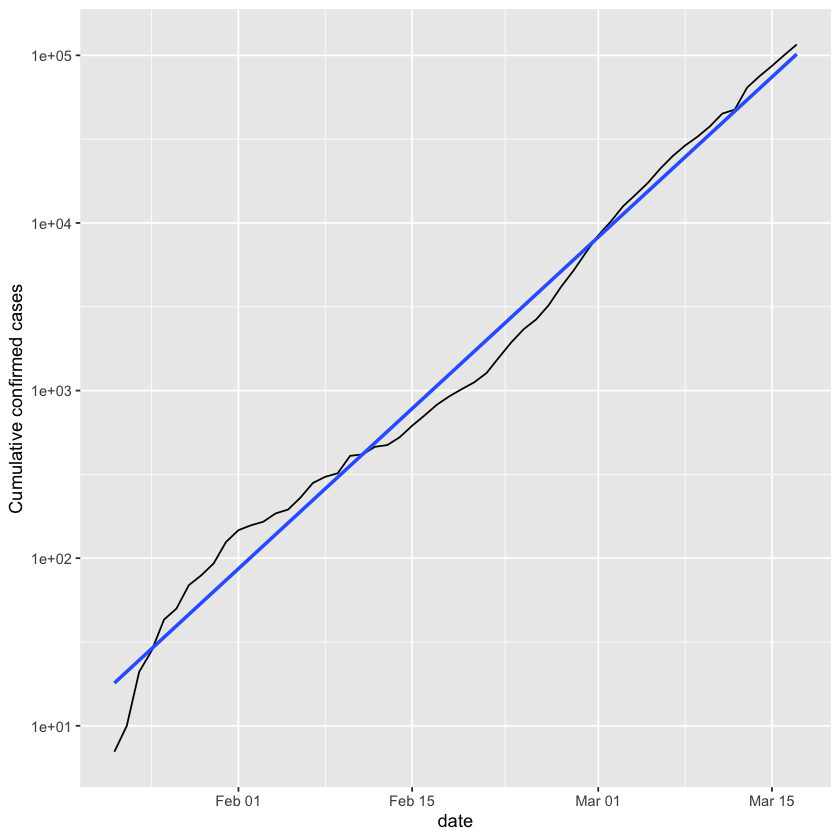

In [15]:
# Filter confirmed_cases_china_vs_world for not China
not_china <- confirmed_cases_china_vs_world %>%
  filter(is_china == "Not China")

# Using not_china, drawing a line plot cum_cases vs. date
# Adding a smooth trend line using linear regression, no error bars
plt_not_china_trend_lin <- ggplot(not_china, aes(date, cum_cases)) +
  geom_line() +
  geom_smooth(method = "lm", se = FALSE) +
  ylab("Cumulative confirmed cases")

# Seeing the result
plt_not_china_trend_lin 

# Modifying the plot to use a logarithmic scale on the y-axis
plt_not_china_trend_lin + 
  scale_y_log10()

From the plot above, we can see a straight line does not fit well at all, and the rest of the world is growing much faster than linearly. By adding a logarithmic scale to the y-axis, I got a much closer fit to the data. That means that cases of COVID-19 in the rest of the world were growing at an exponential rate.

I now want to see which countries outside of China had the most confimed coases, since not all countries were being equally affected by Covid-19

In [18]:
# Getting the data for each country
confirmed_cases_by_country <- read_csv("datasets/confirmed_cases_by_country.csv")
glimpse(confirmed_cases_by_country)

# Group by country, summarize to calculate total cases, find the top 7
top_countries_by_total_cases <- confirmed_cases_by_country %>%
  group_by(country) %>%
  summarize(total_cases = max(cum_cases)) %>%
  top_n(7, total_cases)

# Seeing the result
top_countries_by_total_cases

Rows: 13272 Columns: 5
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (2): country, province
dbl  (2): cases, cum_cases
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 13,272
Columns: 5
$ country   <chr> "Afghanistan", "Albania", "Algeria", "Andorra", "Antigua and~
$ province  <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, ~
$ date      <date> 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22, 2020-01-22,~
$ cases     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~
$ cum_cases <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ~


country,total_cases
<chr>,<dbl>
France,7699
Germany,9257
Iran,16169
Italy,31506
"Korea, South",8320
Spain,11748
US,6421


Even though the outbreak was first identified in China, there is only one country from East Asia (South Korea) in the above table. 

Four of the listed countries (France, Germany, Italy, and Spain) are in Europe and share borders. 

To get more context, I'm going to plot the hardest hit countries' as of Mid-March 2020 confirmed cases over time.

Rows: 2030 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (1): country
dbl  (1): cum_cases
date (1): date

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,030
Columns: 3
$ country   <chr> "Germany", "Iran", "Italy", "Korea, South", "Spain", "US", "~
$ date      <date> 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18, 2020-02-18,~
$ cum_cases <dbl> 16, 0, 3, 31, 2, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,~


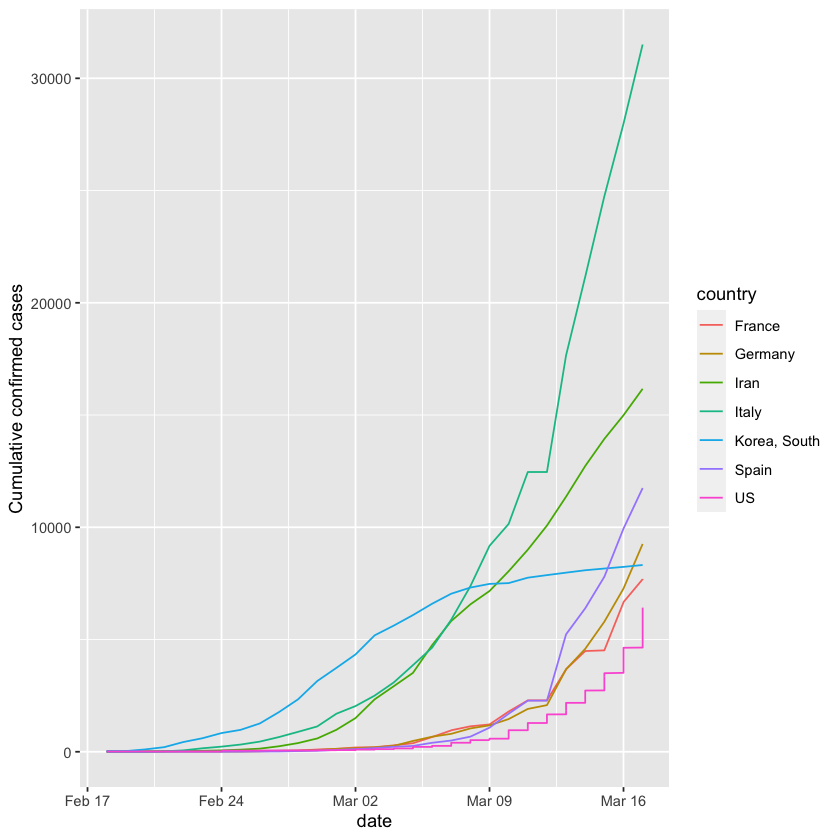

In [19]:
# Read in the dataset from datasets/confirmed_cases_top7_outside_china.csv
confirmed_cases_top7_outside_china <- read_csv("datasets/confirmed_cases_top7_outside_china.csv")

# Glimpse at the contents of confirmed_cases_top7_outside_china
glimpse(confirmed_cases_top7_outside_china)

# Using confirmed_cases_top7_outside_china, draw a line plot of
# cum_cases vs. date, colored by country
ggplot(confirmed_cases_top7_outside_china, aes(date, cum_cases, color = country)) +
  geom_line() +
  ylab("Cumulative confirmed cases")